In [ ]:
#data loader
import pandas as pd
import requests
def load_csv(filepath: str):

    try:
        df = pd.read_csv(filepath)
        print(f"CSV файл {filepath} загружен.")
        return df
    except Exception as e:
        print(f"Ошибка при загрузке CSV: {e}")
        return None
def load_api_url(url: str):
     try:
        responce = requests.get(url)
        responce.raise_for_status()
        data = responce.json()
        print(f"Данные из API {url} загружены.")
        return pd.DataFrame(data)
     except Exception as e:
        print(f"Ошибка при загрузке из API: {e}")
        return None

In [ ]:
#data_processing
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def info(df):
  #Информация о датасете
    return df.info()

def count_missing(df):
    # Количество пропущенных значений в каждом столбце.
    return df.isnull().sum().sort_values(ascending=False)

def missing_report(df):
    #Отчёт о пропущенных значениях
    missing_count = df.isnull().sum()
    missing_percent = (missing_count / len(df)) * 100
    report = pd.DataFrame({
        'Пропущено': missing_count,
        'Процент': missing_percent
    })
    report = report[report['Пропущено'] > 0].sort_values('Пропущено', ascending=False)
    return report

def InfoClass(df):
    #Суммарные данные о классах
    return df.booking_status.value_counts()
def EncodingClass(df):
    le = LabelEncoder()
    df.booking_status = le.fit_transform(df.booking_status)
    return df.booking_status.value_counts()



In [1]:
#main
import loader as ld
import data_processing as dp
import vizualization as dv

df = ld.load_csv('/content/Hotel Reservations.csv')
df.head()


CSV файл /content/Hotel Reservations.csv загружен.


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
#Информация о датасете
dp.info(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Количество пропусков
dp.count_missing(df)

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [ ]:
#Отчет о пропущенных
dp.missing_report(df)

,Пропущено,Процент


In [ ]:
#Суммарные данные о классах
dp.InfoClass(df)

,count
booking_status,
1,24390
0,11885


In [ ]:
#Преобразование значений классов
dp.EncodingClass(df)

,count
booking_status,
1,24390
0,11885


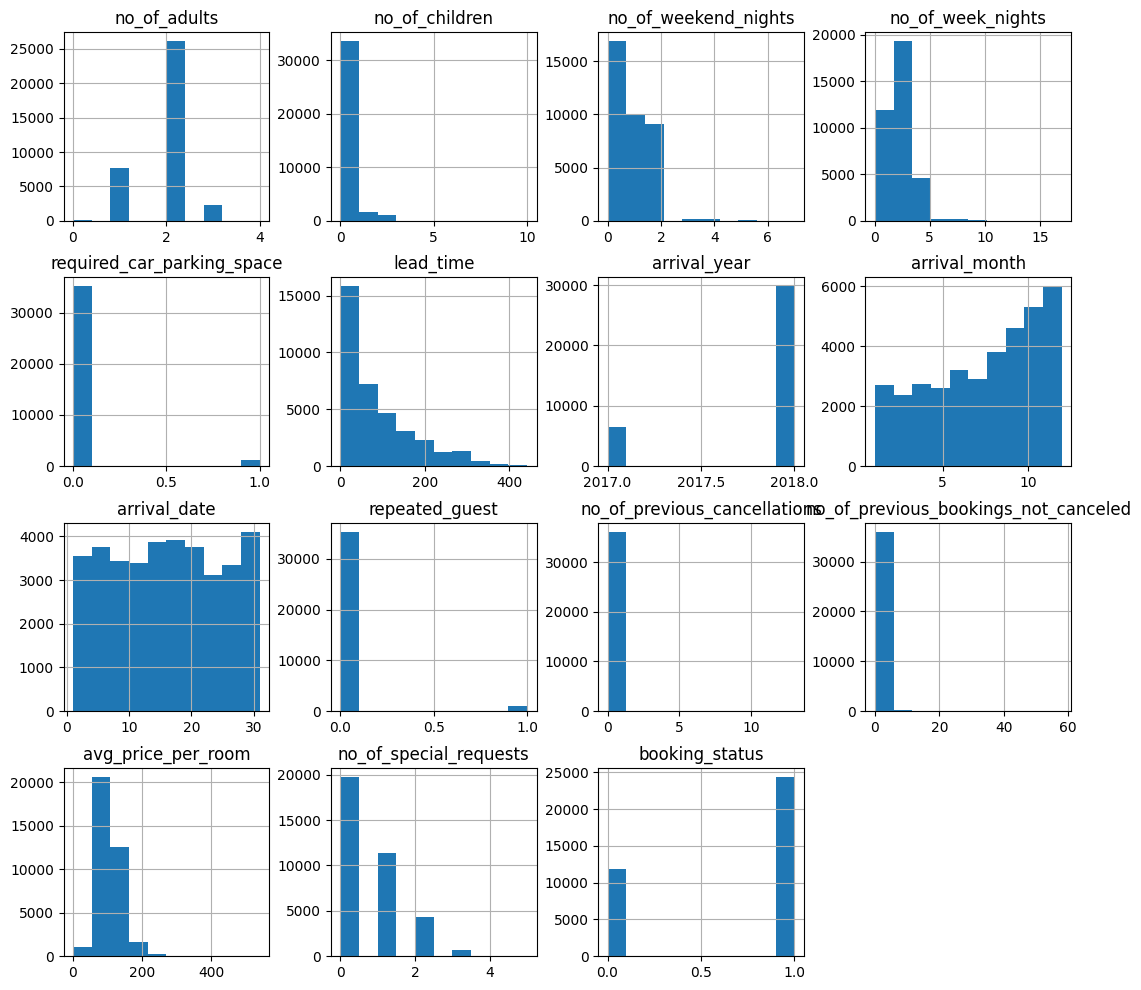

In [ ]:
#Визуализация
dv.Hist(df)

In [7]:
#data_vizualization
import matplotlib.pyplot as plt
import seaborn as sns
def Hist(df):
  df.hist(bins=10, figsize=(13, 12))
  plt.show()
def Pairplt(df, x1, y1):
  sns.scatterplot(df, x=x1, y=y1, palette = 'Set2', hue = 'booking_status')




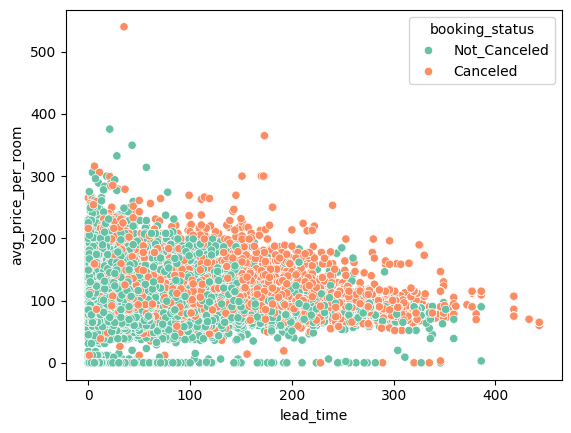

In [2]:
dv.Pairplt(df,"lead_time", "avg_price_per_room" )

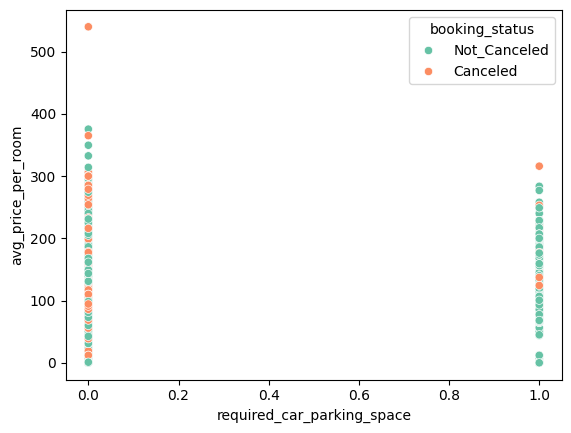

In [7]:
#Наличие парковочного места и цена за номер
dv.Pairplt(df, "required_car_parking_space", "avg_price_per_room" )

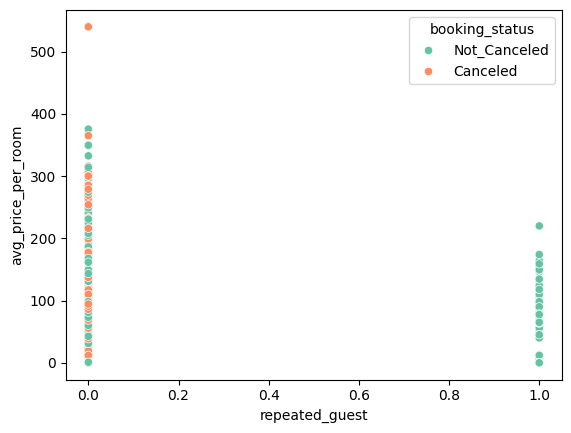

In [8]:
#Постоянный гость и цена за номер
dv.Pairplt(df, "repeated_guest", "avg_price_per_room" )

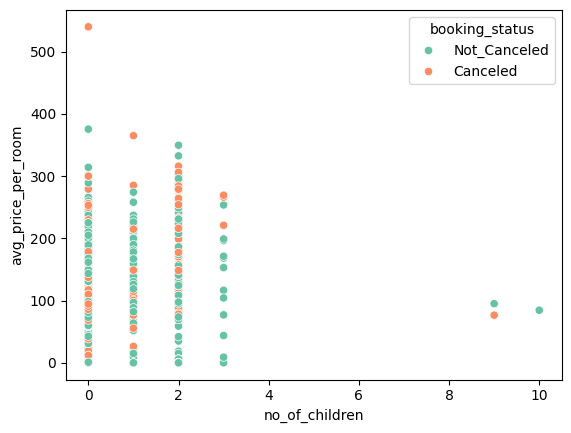

In [13]:
#количество детей и цена за номер
dv.Pairplt(df, "no_of_children", "avg_price_per_room" )